# Project 1 : Bitcoin Price Prediction

The objective of this project is to apply machine learning algorithms to forecast the price of bitcoins.We started by importing the the 2 datasets into the data and test dataframe and explored the data to understand and identify potential trends.The data was time series with 24 features captured over a span of 8 years.

In [1]:
import pandas as pd
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

In [2]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [4]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [5]:
test.describe()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,1.400000e+01,1.400000e+01,1.400000e+01,14.000000,14.000000,14.0,14.000000,14.000000,1.400000e+01,1.400000e+01,...,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,1.400000e+01,14.000000,1.400000e+01
mean,1.685272e+07,1.423698e+11,1.314218e+09,155696.403407,1.040126,0.0,1255.047388,10.015476,2.193311e+07,2.758616e+12,...,1.175282,91.090981,463917.785714,198772.928571,2.982527e+08,192902.142857,139129.714286,1.446917e+06,200598.136451,1.686378e+09
std,8.141179e+03,1.078255e+10,7.171465e+08,680.738338,0.032433,0.0,192.792998,2.096209,2.078680e+06,1.390710e+11,...,0.434149,14.251507,70535.398574,31022.573770,8.061568e+05,30128.169691,17935.088945,3.709158e+05,68615.080236,5.768054e+08
min,1.683969e+07,1.152220e+11,1.884544e+08,154613.224400,0.990488,0.0,974.887417,6.133333,1.872001e+07,2.603080e+12,...,0.717894,71.480272,368624.000000,147208.000000,2.969464e+08,144165.000000,108927.000000,9.100425e+05,85791.951320,7.158013e+08
25%,1.684657e+07,1.392265e+11,9.160092e+08,155169.766625,1.017496,0.0,1118.320086,8.968750,2.043740e+07,2.603080e+12,...,0.827042,79.452894,416448.500000,178840.750000,2.976050e+08,174674.250000,129390.000000,1.162961e+06,152166.633425,1.409819e+09
50%,1.685301e+07,1.426940e+11,1.086909e+09,155724.026900,1.038042,0.0,1252.348566,10.212500,2.165859e+07,2.874670e+12,...,1.075940,87.733267,443873.500000,190904.500000,2.983118e+08,184100.500000,133076.500000,1.429701e+06,196358.522450,1.654924e+09
75%,1.685872e+07,1.495855e+11,1.630138e+09,156199.985800,1.064134,0.0,1383.909556,11.181250,2.365009e+07,2.874670e+12,...,1.404153,100.721708,488689.750000,215702.000000,2.988685e+08,208064.750000,144709.250000,1.645311e+06,246354.431200,1.762742e+09
max,1.686555e+07,1.574340e+11,3.094258e+09,156762.090600,1.102733,0.0,1610.400000,13.675000,2.557925e+07,2.874670e+12,...,2.272316,112.999677,591550.000000,257664.000000,2.994716e+08,249466.000000,179686.000000,2.190613e+06,330740.219200,2.944217e+09


In [6]:
data.shape

(2906, 24)

In [7]:
test.shape

(14, 23)

In [8]:
data.Date = pd.to_datetime(data.Date)
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [9]:
data.dtypes

Date                                                   datetime64[ns]
btc_market_price                                              float64
btc_total_bitcoins                                            float64
btc_market_cap                                                float64
btc_trade_volume                                              float64
btc_blocks_size                                               float64
btc_avg_block_size                                            float64
btc_n_orphaned_blocks                                           int64
btc_n_transactions_per_block                                  float64
btc_median_confirmation_time                                  float64
btc_hash_rate                                                 float64
btc_difficulty                                                float64
btc_miners_revenue                                            float64
btc_transaction_fees                                          float64
btc_cost_per_transac

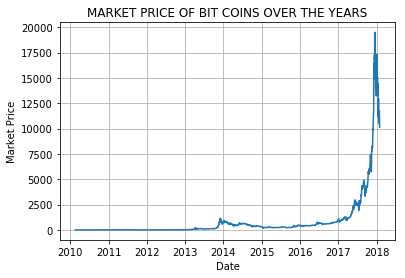

In [10]:
import matplotlib.pyplot as plt
plt.plot(data.Date, data.btc_market_price)
 
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Market Price')
# giving a title to my graph
plt.title('MARKET PRICE OF BIT COINS OVER THE YEARS')
plt.grid(True)
# function to show the plot
plt.show()

On careful examination we found the following columns with missing values.These values constituted more than 5% of the dataset.Therefore,taking into consideration the widely flucationing values we have imputed the mean per month per year to get closest missing values.We are using fillna with the lamba function to compute required mean values.

In [11]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [12]:
# To use group by and impute values
data['mo'] = pd.DatetimeIndex(data['Date']).month
data['ye'] = pd.DatetimeIndex(data['Date']).year

In [13]:
data['btc_total_bitcoins'] = data.groupby(['mo','ye'])['btc_total_bitcoins'].transform( lambda x:x.fillna(x.mean()))
data['btc_trade_volume'] = data.groupby(['mo','ye'])['btc_trade_volume'].transform( lambda x:x.fillna(x.mean()))
data['btc_blocks_size'] = data.groupby(['mo','ye'])['btc_blocks_size'].transform( lambda x:x.fillna(x.mean()))
data['btc_median_confirmation_time'] = data.groupby(['mo','ye'])['btc_median_confirmation_time'].transform( lambda x:x.fillna(x.mean()))
data['btc_difficulty'] = data.groupby(['mo','ye'])['btc_difficulty'].transform( lambda x:x.fillna(x.mean()))
data['btc_transaction_fees'] = data.groupby(['mo','ye'])['btc_transaction_fees'].transform( lambda x:x.fillna(x.mean()))


In [14]:
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

On investigating the correlation values between variables the following variables were dropped as they either could be derived from other variables or had low correlation values with the dependant variable.To check the impact we ran 2 linear models. 

In [15]:
data.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,mo,ye
btc_market_price,1.000000,0.393591,0.999784,0.868838,0.674816,0.544033,-0.076400,0.544125,0.278292,0.920876,...,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308,0.089823,0.480313
btc_total_bitcoins,0.393591,1.000000,0.385634,0.286221,0.779830,0.852797,0.277639,0.832780,0.674210,0.489669,...,0.821866,0.834243,0.783996,0.815967,0.801736,0.293598,0.215697,0.388941,0.054375,0.967898
btc_market_cap,0.999784,0.385634,1.000000,0.869291,0.673144,0.541357,-0.080745,0.541746,0.275006,0.922108,...,0.660761,0.566896,0.678136,0.555714,0.564836,0.112418,0.051361,0.968534,0.089477,0.473882
btc_trade_volume,0.868838,0.286221,0.869291,1.000000,0.521389,0.416135,-0.069085,0.430453,0.217990,0.758369,...,0.539454,0.453807,0.525608,0.442149,0.449881,0.097341,0.056066,0.896044,0.104626,0.352528
btc_blocks_size,0.674816,0.779830,0.673144,0.521389,1.000000,0.956191,0.054121,0.946993,0.508844,0.826139,...,0.966841,0.950442,0.999785,0.952263,0.961439,0.252475,0.154695,0.672627,0.057276,0.883525
btc_avg_block_size,0.544033,0.852797,0.541357,0.416135,0.956191,1.000000,0.147514,0.977887,0.556887,0.687581,...,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090,0.029786,0.931131
btc_n_orphaned_blocks,-0.076400,0.277639,-0.080745,-0.069085,0.054121,0.147514,1.000000,0.114178,0.070147,-0.092103,...,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944,0.006339,0.241020
btc_n_transactions_per_block,0.544125,0.832780,0.541746,0.430453,0.946993,0.977887,0.114178,1.000000,0.561442,0.670598,...,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285,0.038836,0.910435
btc_median_confirmation_time,0.278292,0.674210,0.275006,0.217990,0.508844,0.556887,0.070147,0.561442,1.000000,0.349087,...,0.515879,0.547364,0.514356,0.512513,0.536720,0.308423,0.216348,0.283235,-0.003243,0.630506
btc_hash_rate,0.920876,0.489669,0.922108,0.758369,0.826139,0.687581,-0.092103,0.670598,0.349087,1.000000,...,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864,0.045002,0.604894


In [16]:
d1 = data

In [17]:
X1 = d1.drop(['Date', 'btc_market_price','mo','ye'], axis = 1)
Y1 = d1['btc_market_price']

In [18]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, random_state=0,test_size=0.2)

In [19]:
print ('X1_train shape is : ', X1_train.shape)
print('X1_test shape is : ', X1_test.shape)
print('Y1_train shape is : ', Y1_train.shape)
print('Y1_test shape is : ', Y1_test.shape)

X1_train shape is :  (2324, 22)
X1_test shape is :  (582, 22)
Y1_train shape is :  (2324,)
Y1_test shape is :  (582,)


SCALING TYPE: We have decided to use Min-Max scaling on the bitcoin data to scale data to fixed range of 0 to 1.This will help in reducing the standard deviation and thereby outliers.

# LINEAR REGRESSION

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [21]:
from sklearn.linear_model import LinearRegression

#With all variables
lr = LinearRegression()
lr.fit(X1_train_scaled, Y1_train)
y_predict = lr.predict(X1_train_scaled)
print(lr.score(X1_train_scaled , Y1_train))
print(lr.score(X1_test_scaled , Y1_test))


0.999957007094
0.999960534156


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X1_train_scaled, Y1_train, cv = 5)
print(scores)

[ 0.9999404   0.99995117  0.99996128  0.99996601  0.99995311]


In [23]:
Z1 = test.drop(['Date'], axis = 1)

In [24]:
test_data1 = scaler.transform(Z1)

In [25]:
#Predicted values
print(lr.predict(test_data1))

[ 9059.46362563  8889.98557261  9072.72353513  8403.85060886  6766.85074898
  7592.17081591  8074.19573129  8263.41252017  8556.9664826   8301.06840143
  8357.46301623  8783.40412225  8562.39795784  9283.44452236]


Linear Regression by dropping the following variables:

In [26]:
X2 = d1.drop(['Date', 'btc_market_price', 'btc_cost_per_transaction', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume_usd', 'mo', 'ye'], axis = 1)
Y2 = d1['btc_market_price']

In [27]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=0,test_size=0.2)

In [28]:
print ('X_train shape is : ', X2_train.shape)
print('X_test shape is : ', X2_test.shape)
print('Y_train shape is : ', Y2_train.shape)
print('Y_test shape is : ', Y2_test.shape)

X_train shape is :  (2324, 16)
X_test shape is :  (582, 16)
Y_train shape is :  (2324,)
Y_test shape is :  (582,)


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [30]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()
lr2.fit(X2_train_scaled, Y2_train)
y_predict = lr2.predict(X2_train_scaled)
print(lr2.score(X2_train_scaled , Y2_train))
print(lr2.score(X2_test_scaled , Y2_test))


0.999799602877
0.999838560334


In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X2_train_scaled, Y2_train, cv = 5)
print(scores)

[ 0.99972743  0.99966111  0.99980141  0.99981864  0.99979003]


In [32]:
Z2 = test.drop(['Date', 'btc_cost_per_transaction', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume_usd'], axis = 1)


In [33]:
test_data2 = scaler.transform(Z2)

In [34]:
print(lr.predict(test_data1))

[ 9059.46362563  8889.98557261  9072.72353513  8403.85060886  6766.85074898
  7592.17081591  8074.19573129  8263.41252017  8556.9664826   8301.06840143
  8357.46301623  8783.40412225  8562.39795784  9283.44452236]


In [35]:
print(lr2.predict(test_data2))

[ 9089.06015856  8878.46976159  9092.00595348  8354.02747011  6743.08762312
  7501.19547464  8180.58047801  8366.90122099  8651.24132174  8411.77990741
  8407.92945832  8809.61592539  8621.30084104  9286.15014688]


In [36]:

V = {'Dateval' : ['Feb 1','Feb 2','Feb 3','Feb 4','Feb 5','Feb 6','Feb 7','Feb 8','Feb 9','Feb 10','Feb 11','Feb 12','Feb 13','Feb 14'],
'real_data' : [10142.73,8754.81,8752.05,9091.97,8253.91,6996.93,7634.20,7738.78,7931.53,8887.54,8410.99,8221.00,8915.26,8587.90],
'predwiallvars' : [9059.46,8889.98,9072.72,8403.85,6766.85,7592.17,8074.19,8263.41,8556.96,8301.06,8357.46,8783.40,8562.39,9283.44],
'predwoallvars' : [9089.06,8878.46,9092.00,8354.02,6743.08,7501.19,8180.58,8366.90,8651.24,8411.77,8407.92,8809.61,8621.30,9286.15] }
Verify = pd.DataFrame(data=V)


In [37]:
# Predicted values vis a vis real market price
Verify

,Dateval,predwiallvars,predwoallvars,real_data
0,Feb 1,9059.46,9089.06,10142.73
1,Feb 2,8889.98,8878.46,8754.81
2,Feb 3,9072.72,9092.00,8752.05
3,Feb 4,8403.85,8354.02,9091.97
4,Feb 5,6766.85,6743.08,8253.91
5,Feb 6,7592.17,7501.19,6996.93
6,Feb 7,8074.19,8180.58,7634.20
7,Feb 8,8263.41,8366.90,7738.78
8,Feb 9,8556.96,8651.24,7931.53
9,Feb 10,8301.06,8411.77,8887.54


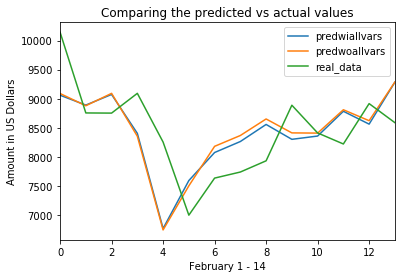

In [38]:
%matplotlib inline
Verify.plot()
plt.xlabel('February 1 - 14')
plt.ylabel('Amount in US Dollars')
plt.title('Comparing the predicted vs actual values')

# RIDGE REGRESSION

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.01, 1, 5, 10, 100]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [40]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.01}
Best score 1.00


In [41]:
ridge = Ridge()
ridge.fit(X2_train_scaled, Y2_train)
print(ridge.score(X2_train_scaled, Y2_train))
print(ridge.score(X2_test_scaled, Y2_test))

0.99679838718
0.996670033187


In [42]:
Z3 = Z2
test_data3 = scaler.transform(Z3)

In [43]:
PR_Ridge = ridge.predict(test_data3)
print(PR_Ridge)

[ 10308.95221314  10569.61508772   9997.76903813   9864.38774792
   9015.64902517   9922.62049746   9512.42207554   9286.76909552
   9528.51283631   9459.31606106   9556.0463463   10215.55901047
   9836.32744759  10892.23457712]


# LASSO REGRESSION

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter = 10000)
param_grid = {'alpha':[1, 5, 10, 20, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 5, 10, 20, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [45]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 1}
Best score 1.00


In [46]:
lasso.fit(X2_train_scaled, Y2_train)
print(lasso.score(X2_train_scaled, Y2_train))
print(lasso.score(X2_test_scaled, Y2_test))

0.999680281317
0.999767230529


In [47]:
Z4 = Z2
test_data4 = scaler.transform(Z4)

In [48]:
PR_Lasso = lasso.predict(test_data4)
print(PR_Lasso)

[ 9084.13665616  8924.30728968  9069.49816733  8425.66432963  6885.36599555
  7710.27091719  8080.27713036  8203.36181936  8501.00134466  8300.2008417
  8333.04415267  8820.39997932  8606.24980227  9362.4212038 ]


# POLYNOMIAL REGRESSION

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X2_train)
X_test_poly= poly.transform(X2_test)

lr3 = LinearRegression()

scores = cross_val_score(lr3, X_train_poly, Y2_train, cv = 5)
print(scores)

lr3.fit(X_train_poly, Y2_train)
lr3.predict(X_test_poly)

print(lr3.score(X_train_poly, Y2_train))
print(lr3.score(X_test_poly, Y2_test))


[ 0.99997734  0.99995754  0.99995882  0.99994923  0.99996588]
0.999983290153
0.999976690363


In [51]:
Z5 = Z2
test_data5 = poly.transform(Z5)
PR_Poly_L = lr3.predict(test_data5)
print((PR_Poly_L))

[ 9114.64309408  9005.37608645  9045.34000541  8496.28654225  7077.38315867
  7881.68175967  8052.09871078  8211.58047254  8528.44602254  8247.02235883
  8260.87919598  8853.21338601  8635.06662502  9425.31098392]


# Support Vector Machines

In [52]:
from sklearn.svm import SVR

svrlinear = SVR(kernel = 'linear')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svrlinear, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [53]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 100, 'gamma': 0.001}
Best score 0.93


In [54]:
svrlinear = SVR(kernel ='linear', C=100,gamma= 0.001)
svrlinear.fit(X2_train_scaled, Y2_train)
svrlinear.predict(X2_test_scaled)

print(svrlinear.score(X2_train_scaled, Y2_train))
print(svrlinear.score(X2_test_scaled, Y2_test))

0.958231108088
0.955657992128


In [55]:
Z6 = Z2
test_data6 = scaler.transform(Z6)
PR_SVR_L = svrlinear.predict(test_data6)
print((PR_SVR_L))

[ 10138.73964302  10607.37297116   9859.27556812  10113.79237669
   9845.56406362  10580.46960201   9765.50783877   9417.97652999
   9592.49833037   9652.2615491    9856.68852349  10451.33026246
  10076.52858227  11066.05696444]


In [57]:
from sklearn.svm import SVR

svrkernel = SVR(kernel = 'rbf')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0
                        .1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svrkernel, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [58]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 100, 'gamma': 0.5}
Best score 0.74


In [59]:
svrkernel = SVR(kernel ='rbf', C=100,gamma= 0.5)

svrkernel.fit(X2_train_scaled, Y2_train)
svrkernel.predict(X2_test_scaled)

print(svrkernel.score(X2_train_scaled, Y2_train))
print(svrkernel.score(X2_test_scaled, Y2_test))

0.80005384316
0.779742612347


In [60]:
Z7 = Z2
test_data7 = scaler.transform(Z7)
PR_SVR_K = svrkernel.predict(test_data7)
print((PR_SVR_K))

[ 7489.60810676  7368.6205508   7071.635635    6738.42082306  6766.81200744
  6880.41104679  7008.93027852  6749.48512144  6874.85350394  6792.39673231
  6493.41836586  6770.24495708  6625.18687944  6769.80701371]


# KNN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knnreg = KNeighborsRegressor()
param_grid = {'n_neighbors':[5,10,15,20]}

grid_search = GridSearchCV(knnreg, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 5}
Best score 0.99


In [63]:
knnreg.fit(X2_train_scaled, Y2_train)
knnreg.predict(X2_test_scaled)

print(knnreg.score(X2_train_scaled, Y2_train))
print(knnreg.score(X2_test_scaled, Y2_test))

0.995954784008
0.991611479984


In [64]:
Z8 = Z2
test_data8 = scaler.transform(Z8)
PR_KNN = knnreg.predict(test_data8)
print((PR_KNN))

[ 10825.113     10827.1948    11131.403668  11131.760668  11131.760668
  10827.1948    11131.403668  10803.264334  11131.403668  11131.403668
  11131.403668  11131.403668  11131.403668  11131.760668]


# DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()

param_grid = {'max_depth': range(1,11)}

grid_search = GridSearchCV(regressor, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)   

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [66]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 6}
Best score 1.00


In [70]:
regressor = DecisionTreeRegressor(max_depth = 6)
regressor.fit(X2_train_scaled, Y2_train)
regressor.predict(X2_test_scaled)

print(regressor.score(X2_train_scaled, Y2_train))
print(regressor.score(X2_test_scaled, Y2_test))

0.999728821018
0.999238607981


In [71]:
Z9 = Z2
test_data9 = scaler.transform(Z9)
PR_DT = regressor.predict(test_data9)
print((PR_DT))

[ 10057.6568306  10057.6568306  10057.6568306  10057.6568306  10544.59333
  10057.6568306  10057.6568306  10057.6568306  10544.59333    10057.6568306
  10057.6568306  10057.6568306  10057.6568306  10057.6568306]


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF_regressor = RandomForestRegressor()

param_grid = {'max_depth': range(1,11),'n_estimators' : [10,50,100]}

grid_search = GridSearchCV(RF_regressor, param_grid, cv = 5)
grid_search.fit(X2_train_scaled, Y2_train)   

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 11), 'n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 10, 'n_estimators': 50}
Best score 1.00


In [73]:
RT_regressor = RandomForestRegressor(max_depth = 10,n_estimators = 50)
RT_regressor.fit(X2_train_scaled, Y2_train)
RT_regressor.predict(X2_test_scaled)

print(RT_regressor.score(X2_train_scaled, Y2_train))
print(RT_regressor.score(X2_test_scaled, Y2_test))

0.999895972689
0.999629581957


In [74]:
Z10 = Z2
test_data10 = scaler.transform(Z10)
PR_RF = RT_regressor.predict(test_data10)
print((PR_RF))

[ 9739.81488156  9641.28460654  9792.11811462  9468.74615162  9238.73446984
  9331.9623573   9394.71301744  9400.68085178  9458.70575204  9424.4359999
  9452.23775262  9631.1563645   9536.02590088  9968.315307  ]


In [75]:

Predict_Reg_Values = {'Dateval' : ['Feb 1','Feb 2','Feb 3','Feb 4','Feb 5','Feb 6','Feb 7','Feb 8','Feb 9','Feb 10','Feb 11','Feb 12','Feb 13','Feb 14'],
'real_data' : [10142.73,8754.81,8752.05,9091.97,8253.91,6996.93,7634.20,7738.78,7931.53,8887.54,8410.99,8221.00,8915.26,8587.90],
'Linear Regression' : [9089.06,8878.46,9092.00,8354.02,6743.08,7501.19,8180.58,8366.90,8651.24,8411.77,8407.92,8809.61,8621.30,9286.15],
'Ridge Regression' : PR_Ridge,
'Lasso Regression' : PR_Lasso,
'Polynomial Regression' : PR_Poly_L,
'Linear Support Vector Regression' : PR_SVR_L,
'Kernal Support Vector Regression' : PR_SVR_K,
'KNN Regression' :PR_KNN,
'Decision Tree Regression' : PR_DT,
'Random Forest Regression' : PR_RF }
RegVal = pd.DataFrame(data=Predict_Reg_Values)
RegVal

,Dateval,Decision Tree Regression,KNN Regression,Kernal Support Vector Regression,Lasso Regression,Linear Regression,Linear Support Vector Regression,Polynomial Regression,Random Forest Regression,Ridge Regression,real_data
0,Feb 1,10057.656831,10825.113000,7489.608107,9084.136656,9089.06,10138.739643,9114.643094,9739.814882,10308.952213,10142.73
1,Feb 2,10057.656831,10827.194800,7368.620551,8924.307290,8878.46,10607.372971,9005.376086,9641.284607,10569.615088,8754.81
2,Feb 3,10057.656831,11131.403668,7071.635635,9069.498167,9092.00,9859.275568,9045.340005,9792.118115,9997.769038,8752.05
3,Feb 4,10057.656831,11131.760668,6738.420823,8425.664330,8354.02,10113.792377,8496.286542,9468.746152,9864.387748,9091.97
4,Feb 5,10544.593330,11131.760668,6766.812007,6885.365996,6743.08,9845.564064,7077.383159,9238.734470,9015.649025,8253.91
5,Feb 6,10057.656831,10827.194800,6880.411047,7710.270917,7501.19,10580.469602,7881.681760,9331.962357,9922.620497,6996.93
6,Feb 7,10057.656831,11131.403668,7008.930279,8080.277130,8180.58,9765.507839,8052.098711,9394.713017,9512.422076,7634.20
7,Feb 8,10057.656831,10803.264334,6749.485121,8203.361819,8366.90,9417.976530,8211.580473,9400.680852,9286.769096,7738.78
8,Feb 9,10544.593330,11131.403668,6874.853504,8501.001345,8651.24,9592.498330,8528.446023,9458.705752,9528.512836,7931.53
9,Feb 10,10057.656831,11131.403668,6792.396732,8300.200842,8411.77,9652.261549,8247.022359,9424.436000,9459.316061,8887.54


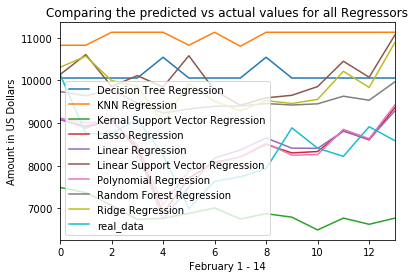

In [76]:
%matplotlib inline
RegVal.plot()
plt.xlabel('February 1 - 14')
plt.ylabel('Amount in US Dollars')
plt.title('Comparing the predicted vs actual values for all Regressors')

In [88]:
Value = RegVal
Value1 = Value[['Dateval','Linear Regression','Lasso Regression','Polynomial Regression','real_data']]

In [90]:
Value1

,Dateval,Linear Regression,Lasso Regression,Polynomial Regression,real_data
0,Feb 1,9089.06,9084.136656,9114.643094,10142.73
1,Feb 2,8878.46,8924.307290,9005.376086,8754.81
2,Feb 3,9092.00,9069.498167,9045.340005,8752.05
3,Feb 4,8354.02,8425.664330,8496.286542,9091.97
4,Feb 5,6743.08,6885.365996,7077.383159,8253.91
5,Feb 6,7501.19,7710.270917,7881.681760,6996.93
6,Feb 7,8180.58,8080.277130,8052.098711,7634.20
7,Feb 8,8366.90,8203.361819,8211.580473,7738.78
8,Feb 9,8651.24,8501.001345,8528.446023,7931.53
9,Feb 10,8411.77,8300.200842,8247.022359,8887.54


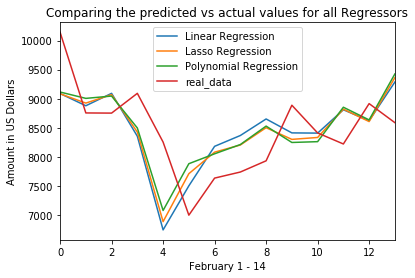

In [89]:
%matplotlib inline
Value1.plot()
plt.xlabel('February 1 - 14')
plt.ylabel('Amount in US Dollars')
plt.title('Comparing the predicted vs actual values for all Regressors')


As per the above graph and predicted values vs real data we can conclude Polynomial Regression is the best model amongst all the other models.The accuracy for Polynomial Regression is 0.999976690363.
Note:The real data was for the specfied time period was referenced from https://www.coindesk.com/price/.